In [21]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [9]:
url = 'https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv'
df = pd.read_csv(url)

In [10]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
# Let's drop irrelevant cols
df = df.drop(['#', 'Name', 'Type 1', 'Type 2', 'Generation', 'Legendary'], axis=1)

In [12]:
# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

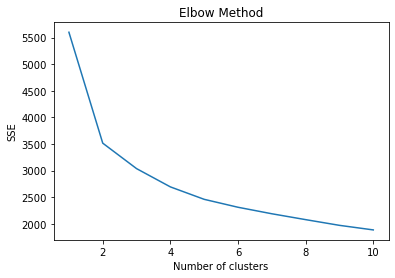

In [14]:
# Optimal number of clusters and plot
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Based on the Elbow method, we can determine that the optimal number of clusters is 3.

In [15]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [16]:
df['cluster'] = kmeans.labels_

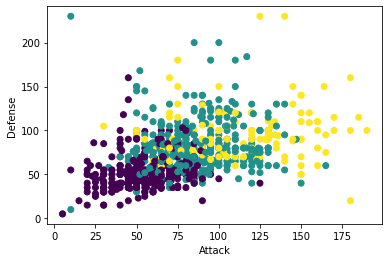

In [17]:
# Visualize the data
plt.scatter(df['Attack'], df['Defense'], c=df['cluster'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

We can see that the clusters are based on the Attack and Defense stats of the Pokemon. Cluster 1 may represent high Attack and low Defense Pokemon, Cluster 2 may represent low Attack and high Defense Pokemon, and Cluster 3 may represent balanced Pokemon with moderate Attack and Defense stats. 

## Visualize the Clusters

In [22]:
# Let's use PCA to reduce the dimensionality
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled)

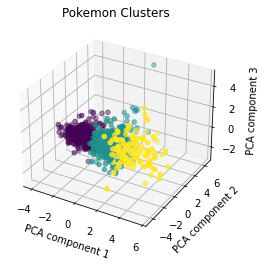

In [23]:
# 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=df['cluster'])
ax.set_title('Pokemon Clusters')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')
ax.set_zlabel('PCA component 3')
plt.show()